<h1><u style="color:  black;">Medical Insurance Cost Prediction</u></h1>

<h4
>health insurance company can only make money if it collects more than it spends on the medical care of its beneficiaries. On the other hand, even though some conditions are more prevalent for certain segments of the population, medical costs are difficult to predict since most money comes from rare conditions of the patients.

<h1> <u style="color: black;"> PROJECT STATEMENT </u>
<H2>The objective of this article is to accurately predict insurance costs based on people’s data, including age, Body Mass Index, smoking or not, etc. 

<h4><u style="color: grey;">Importing the Dependencies</u></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


<h4> <u style="color:  grey;">DATA COLLECTION</u></h3>


In [2]:
data = pd.read_csv(
    r"C:\Users\DEVANSH\Desktop\projects\Medical Insurance Cost Prediction\insurance.csv")

# first 5 lines of dataset
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# number of rows and columns
data.shape


(1338, 7)

In [4]:
# getting more information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h3><u style="color:  grey;">Features which don't have numerical values are categorical values</u></h3>


<h4>Categorical Features: <br>

<ol>
  <li>Sex</li>
  <li>Smoker</li>
  <li>Region</li>
</ol>

In [5]:
# checking for isnull
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h1> <u style="color: black;">DATA VISUALISATION</u></h1>
<H3 style="color:  grey;">ANALISING COLUMN BY COLUMN

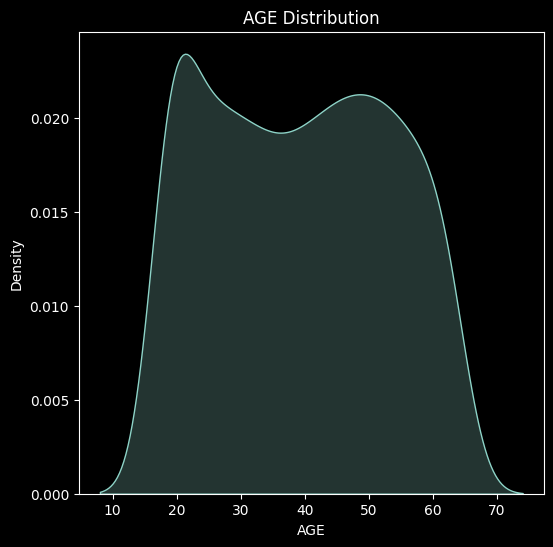

In [7]:
# AGE VS CHARGE
plt.figure(figsize=(6, 6))
sns.kdeplot(data['age'], fill=True)
plt.xlabel('AGE')
plt.ylabel('Density')
plt.title('AGE Distribution')
plt.show()


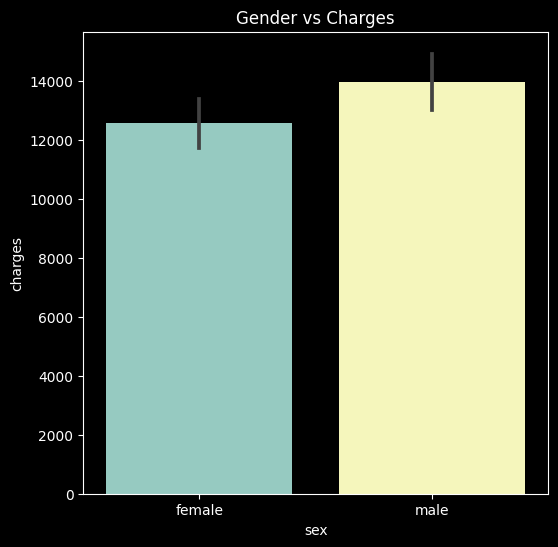

In [8]:
# SEX VS CHARGE
plt.figure(figsize=(6, 6))
sns.barplot(data=data, x='sex', y='charges')
plt.title('Gender vs Charges')
plt.show()


In [9]:
data.sex.value_counts()


sex
male      676
female    662
Name: count, dtype: int64

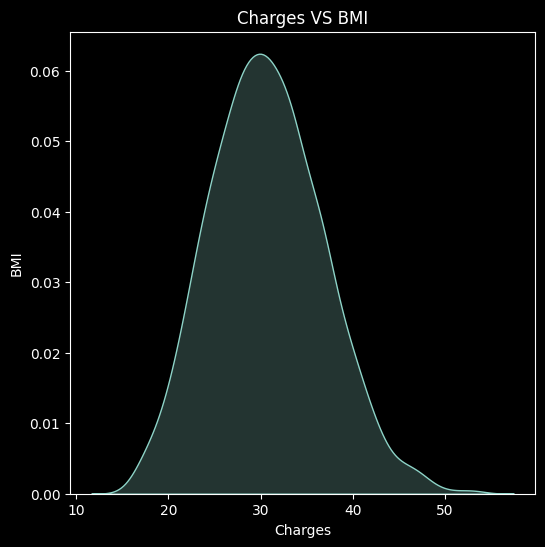

In [10]:
# CHARGE VS BMI (Normal BMI Range --> 18.5 to 24.9)

plt.figure(figsize=(6, 6))
sns.kdeplot(data['bmi'], fill=True)
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.title('Charges VS BMI')
plt.show()



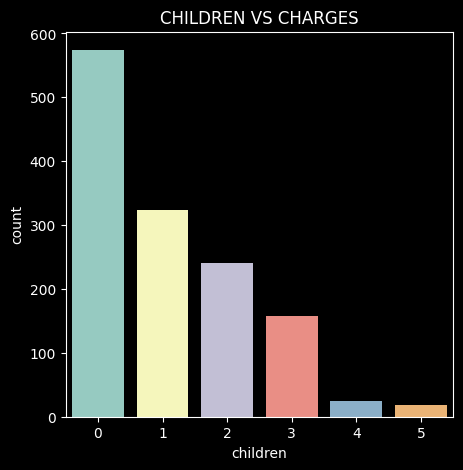

In [11]:
# children vs chages (countplot)
plt.figure(figsize=(5, 5))
sns.countplot(x=data.children, data=data)
plt.title("CHILDREN VS CHARGES")
plt.show()


In [12]:
data.children.value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

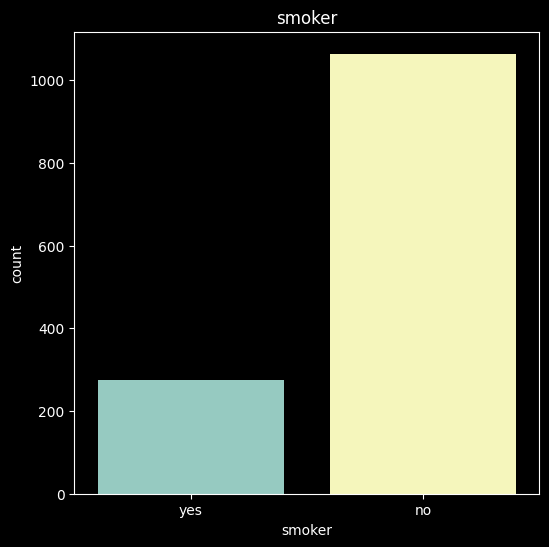

smoker
no     1064
yes     274
Name: count, dtype: int64


In [13]:
# smoker column
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

print(data['smoker'].value_counts())


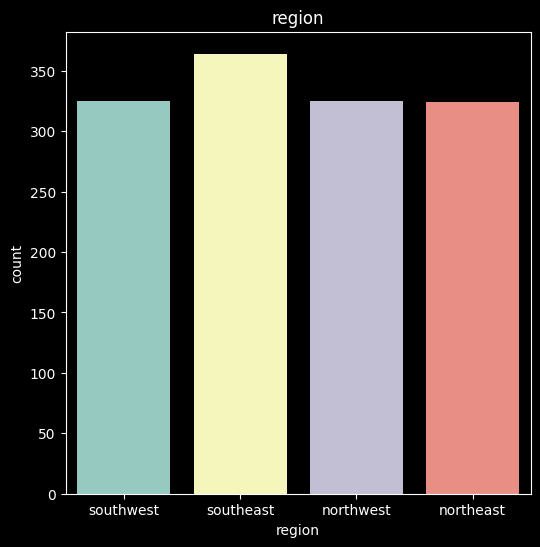

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [14]:
# religion vs charge
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

print(data['region'].value_counts())


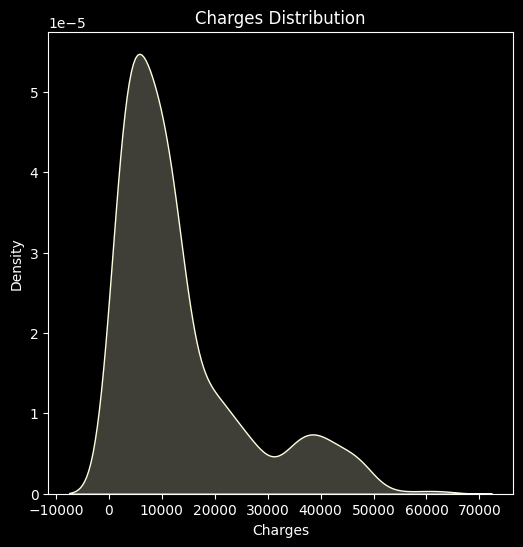

In [15]:
# distribution of charges value
plt.figure(figsize=(6, 6))
sns.kdeplot(data['charges'], color=(
    1.0, 1.0, 0.8784313725490196, 0.5), fill=True)
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Charges Distribution')
plt.show()


<h1><u style="color:  black;">Data Pre-Processing </u></h1>

<h2 u style="color:  grey;">Encoding the categorical features

In [16]:
# encoding sex column
data.replace({"sex": {"male": 0, "female": 1}}, inplace=True)

# encoding smoker column
data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# encoding 'region' column
data.replace({'region': {'southeast': 0, 'southwest': 1,
             'northeast': 2, 'northwest': 3}}, inplace=True)

data


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [17]:
input = data.drop("charges", axis="columns")
input


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [18]:
target = data.charges
target


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<h1> <u style="color:  black">Training Model</u></h1>

<h2> <u style="color: black;">Splitting the data into Training data & Testing Data</u></h2>

In [19]:
from sklearn.model_selection import train_test_split
charge_test, charge_train, target_test, target_train = train_test_split(
    input, target, test_size=0.2)
print(charge_test.shape, charge_train.shape,
      target_test.shape, target_train.shape)


(1070, 6) (268, 6) (1070,) (268,)


<h1> <u style="color:  black;">LINEAR REGRESSION </u></h1>

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(charge_train, target_train)


LinearRegression()

In [21]:
model.score(charge_train, target_train)


0.7065125772956156

prediction of charges

In [22]:

charge_prediction = model.predict(charge_train)
charge_prediction


array([ 3476.27753333,  2249.50838045,  3753.11446379,  8610.52459192,
        9729.2570203 , 12473.26862648,  5894.81518259, 12217.63970337,
       11417.50975115,  5303.67376569,  3140.76575637,  1841.21426188,
       28641.82255845, 24666.94828483, 11859.52211112,  7102.28557019,
        4305.16348828, 10359.62667906,  2198.78246216, 10088.7225943 ,
       14541.42728267, 12106.20039979,  8089.18793985, 12722.35123029,
        7902.09796892,  5693.47200737,  7552.76166226, 38052.99437147,
        6784.90196339,  -398.44409418, 15016.63477564,  4349.60557815,
       26462.30134373, 11978.75751259,  4605.57356423, 10745.98899397,
       34297.8522125 ,  9591.57080953, 32511.65058436, 12939.52872183,
        6395.70542398, 13101.3678109 ,  5413.12984761,   409.64202895,
        4439.3996653 , 11590.63195179,  9875.47851981,  6582.28773009,
       17878.06827575, 21815.31136651, 29289.16292554, 29738.89026954,
        2593.98543706,  1739.07482368,  9354.12555232,  5443.63723351,
      

<h3>R squared value

In [23]:
# R squared value
# coefficient of determination
from sklearn import metrics
# comparing original data and predicted data
r2_test = metrics.r2_score(target_train, charge_prediction)
print('R squared vale : ', r2_test)


R squared vale :  0.7065125772956156


<h1 u style="color:  black;">Building a Predictive System

In [24]:
input_data = (31, 1, 25.74, 0, 1, 0)
# changing input data to numpy
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_data_as_numpy_array)
print('The insurance cost is USD ', prediction[0])


The insurance cost is USD  4318.192302111667


c:\Users\DEVANSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
